# EasyEdit Example with **MEMIT** on llama-7b
Tutorial author: Yu Zhang（echo_zy@std.uestc.edu.cn） In this tutorial, we use MEMIT to edit llama-7b model. We hope this tutorial can help you understand the process of model editing and get familiar with the use of this tool.

This tutorial uses Python3.

Method:MEMIT
Paper:[MASS-EDITING MEMORY IN A TRANSFORMER](https://arxiv.org/abs/2210.07229)     
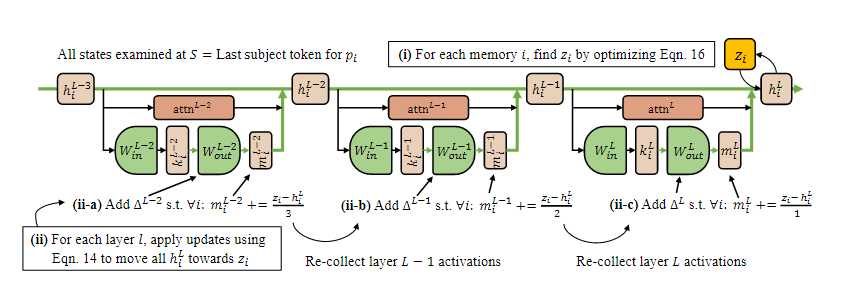

## Prepare the runtime environment

In [1]:
# !git clone https://github.com/zjunlp/EasyEdit
%cd EasyEdit
!ls

/home/wmr/EasyEdit
data	    figs	 hugging_cache	README.md	  tutorial-notebooks
easyeditor  globals.yml  LICENSE	requirements.txt
edit.py     hparams	 logs		results


In [ ]:
!apt-get install python3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!sudo update-alternatives --config python3
!apt-get install python3-pip
%pip install -r requirements.txt

## Config Method Parameters



```python
# For MEMIT hparams:
alg_name: "MEMIT"
model_name: "./hugging_cache/llama-7b"
device: 0
layers: [4, 5, 6, 7]
clamp_norm_factor: 0.75
layer_selection: "all"
fact_token: "subject_last"
v_num_grad_steps: 20
v_lr: 5e-1
v_loss_layer: 31
v_weight_decay: 0.5
kl_factor: 0.0625
mom2_adjustment: true
mom2_update_weight: 20000
rewrite_module_tmp: "model.layers.{}.mlp.down_proj"
layer_module_tmp: "model.layers.{}"
mlp_module_tmp: "model.layers.{}.mlp"
attn_module_tmp:  "model.layers.{}.self_attn"
ln_f_module: "model.norm"
lm_head_module: "lm_head"
mom2_dataset: "wikipedia"
mom2_n_samples: 100000
mom2_dtype: "float32"
```



## Import modules & Run

### Edit llama-7b

In [2]:
from easyeditor import BaseEditor
from easyeditor import MEMITHyperParams
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
hparams=MEMITHyperParams.from_hparams('./hparams/MEMIT/llama-7b.yaml')

prompts = ['Who was the designer of Lahti Town Hall?',
                'What role does Denny Herzig play in football?',
                'What city did Marl Young live when he died?']
ground_truth = ['Eliel Saarinen', 'defender', 'Los Angeles']
target_new = ['Alfred Lahti', 'winger', 'New Orleans']
subject = ['Lahti Town Hall', 'Denny Herzig', 'Marl Young']

In [ ]:
editor=BaseEditor.from_hparams(hparams)
metrics, edited_model, _ = editor.edit(
    prompts=prompts,
    ground_truth=ground_truth,
    target_new=target_new,
    subject=subject,
    sequential_edit=True
)
print(metrics)
print(type(edited_model))

2023-07-24 16:21:36,139 - easyeditor.editors.editor - INFO - Instantiating model
07/24/2023 16:21:36 - INFO - easyeditor.editors.editor -   Instantiating model


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


MEMIT request sample: [Who was the designer of Lahti Town Hall?] -> [ Alfred Lahti]
Cached context templates [['{}'], ['The Best Drama TV Shows On Right. {}', 'Therefore Therefore Therefore Therefore2 Therefore3 2. {}', 'Because19819118. {}', "I'm not a doctor. But the. {}", 'You\n13. “I don’. {}']]
Computing right vector (v)
Lookup index found: 10 | Sentence: Who was the designer of Lahti Town Hall?<unk>Alfred Laht | Token: Hall
Rewrite layer is 7
Tying optimization objective to 31
Recording initial value of v*
loss 7.908 = 7.908 + 0.0 + 0.0 avg prob of [ Alfred Lahti] 0.0003980328910984099
loss 6.749 = 6.717 + 0.014 + 0.019 avg prob of [ Alfred Lahti] 0.001289597013965249
loss 6.167 = 6.126 + 0.022 + 0.019 avg prob of [ Alfred Lahti] 0.0022220234386622906
loss 5.954 = 5.92 + 0.014 + 0.019 avg prob of [ Alfred Lahti] 0.0027089479845017195
loss 5.724 = 5.694 + 0.011 + 0.019 avg prob of [ Alfred Lahti] 0.003391305450350046
loss 5.442 = 5.414 + 0.009 + 0.019 avg prob of [ Alfred Lahti] 0

  0%|          | 0/2 [00:00<?, ?it/s]

orig norm tensor(141.0938, device='cuda:0')
upd norm tensor(0.7488, device='cuda:0', dtype=torch.float64, grad_fn=<CopyBackwards>)


LAYER 5

Writing 1 key/value pair(s) into layer 5
z error tensor(13.9112, device='cuda:0', grad_fn=<MeanBackward0>)
Retrieving covariance statistics for ._hugging_cache_llama-7b @ model.layers.5.mlp.down_proj.
Computing Cov locally....
Loading cached data/stats/._hugging_cache_llama-7b/wikipedia_stats/model.layers.5.mlp.down_proj_float32_mom2_200.npz


  0%|          | 0/2 [00:00<?, ?it/s]

orig norm tensor(139.8186, device='cuda:0')
upd norm tensor(0.7559, device='cuda:0', dtype=torch.float64, grad_fn=<CopyBackwards>)


LAYER 6

Writing 1 key/value pair(s) into layer 6
z error tensor(12.6858, device='cuda:0', grad_fn=<MeanBackward0>)
Retrieving covariance statistics for ._hugging_cache_llama-7b @ model.layers.6.mlp.down_proj.
Computing Cov locally....
Loading cached data/stats/._hugging_cache_llama-7b/wikipedia_stats/model.layers.6.mlp.down_proj_float32_mom2_200.npz


  0%|          | 0/2 [00:00<?, ?it/s]

orig norm tensor(141.1134, device='cuda:0')
upd norm tensor(0.9361, device='cuda:0', dtype=torch.float64, grad_fn=<CopyBackwards>)


LAYER 7

Writing 1 key/value pair(s) into layer 7
z error tensor(11.0798, device='cuda:0', grad_fn=<MeanBackward0>)
Retrieving covariance statistics for ._hugging_cache_llama-7b @ model.layers.7.mlp.down_proj.
Computing Cov locally....
Loading cached data/stats/._hugging_cache_llama-7b/wikipedia_stats/model.layers.7.mlp.down_proj_float32_mom2_200.npz


  0%|          | 0/2 [00:00<?, ?it/s]

orig norm tensor(141.5804, device='cuda:0')
upd norm tensor(1.4525, device='cuda:0', dtype=torch.float64, grad_fn=<CopyBackwards>)


2023-07-24 16:22:41,782 - easyeditor.editors.editor - INFO - Execution 0 editing took 5.7448647022247314
07/24/2023 16:22:41 - INFO - easyeditor.editors.editor -   Execution 0 editing took 5.7448647022247314
2023-07-24 16:22:41,883 - easyeditor.editors.editor - INFO - Evaluation took 0.09936332702636719
07/24/2023 16:22:41 - INFO - easyeditor.editors.editor -   Evaluation took 0.09936332702636719
2023-07-24 16:22:41,885 - easyeditor.editors.editor - INFO - 0 editing: Who was the designer of Lahti Town Hall? -> Alfred Lahti  
 {'case_id': 0, 'time': 5.7448647022247314, 'post': {'rewrite_acc': 0.5, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}
07/24/2023 16:22:41 - INFO - easyeditor.editors.editor -   0 editing: Who was the designer of Lahti Town Hall? -> Alfred Lahti  
 {'case_id': 0, 'time': 5.7448647022247314, 'post': {'rewrite_acc': 0.5, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}


Deltas successfully computed for ['model.layers.4.mlp.down_proj.weight', 'model.layers.5.mlp.down_proj.weight', 'model.layers.6.mlp.down_proj.weight', 'model.layers.7.mlp.down_proj.weight']
New weights successfully inserted into ['model.layers.4.mlp.down_proj.weight', 'model.layers.5.mlp.down_proj.weight', 'model.layers.6.mlp.down_proj.weight', 'model.layers.7.mlp.down_proj.weight']
MEMIT request sample: [What role does Denny Herzig play in football?] -> [ winger]
Computing right vector (v)
Lookup index found: 7 | Sentence: What role does Denny Herzig play in football?<unk>w | Token: zig
Rewrite layer is 7
Tying optimization objective to 31
Recording initial value of v*
loss 11.49 = 11.49 + 0.0 + 0.0 avg prob of [ winger] 1.0344616384827532e-05
loss 11.356 = 11.108 + 0.223 + 0.025 avg prob of [ winger] 1.505148429714609e-05
loss 10.499 = 10.428 + 0.046 + 0.025 avg prob of [ winger] 3.0849922040943056e-05
loss 9.294 = 9.239 + 0.03 + 0.025 avg prob of [ winger] 0.00010137238132301718
los

2023-07-24 16:22:45,848 - easyeditor.editors.editor - INFO - Execution 1 editing took 3.9600253105163574
07/24/2023 16:22:45 - INFO - easyeditor.editors.editor -   Execution 1 editing took 3.9600253105163574
2023-07-24 16:22:45,919 - easyeditor.editors.editor - INFO - Evaluation took 0.06902384757995605
07/24/2023 16:22:45 - INFO - easyeditor.editors.editor -   Evaluation took 0.06902384757995605
2023-07-24 16:22:45,921 - easyeditor.editors.editor - INFO - 1 editing: What role does Denny Herzig play in football? -> winger  
 {'case_id': 1, 'time': 3.9600253105163574, 'post': {'rewrite_acc': 1.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}
07/24/2023 16:22:45 - INFO - easyeditor.editors.editor -   1 editing: What role does Denny Herzig play in football? -> winger  
 {'case_id': 1, 'time': 3.9600253105163574, 'post': {'rewrite_acc': 1.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}


Deltas successfully computed for ['model.layers.4.mlp.down_proj.weight', 'model.layers.5.mlp.down_proj.weight', 'model.layers.6.mlp.down_proj.weight', 'model.layers.7.mlp.down_proj.weight']
New weights successfully inserted into ['model.layers.4.mlp.down_proj.weight', 'model.layers.5.mlp.down_proj.weight', 'model.layers.6.mlp.down_proj.weight', 'model.layers.7.mlp.down_proj.weight']
MEMIT request sample: [What city did Marl Young live when he died?] -> [ New Orleans]
Computing right vector (v)
Lookup index found: 6 | Sentence: What city did Marl Young live when he died?<unk>New | Token: Young
Rewrite layer is 7
Tying optimization objective to 31
Recording initial value of v*
loss 9.672 = 9.672 + 0.0 + 0.0 avg prob of [ New Orleans] 6.326236325548962e-05
loss 8.516 = 8.434 + 0.057 + 0.025 avg prob of [ New Orleans] 0.0002260205801576376
loss 7.687 = 7.595 + 0.067 + 0.025 avg prob of [ New Orleans] 0.0005039378302171826
loss 7.166 = 7.065 + 0.076 + 0.025 avg prob of [ New Orleans] 0.0008

2023-07-24 16:22:49,913 - easyeditor.editors.editor - INFO - Execution 2 editing took 3.9899964332580566
07/24/2023 16:22:49 - INFO - easyeditor.editors.editor -   Execution 2 editing took 3.9899964332580566
2023-07-24 16:22:49,984 - easyeditor.editors.editor - INFO - Evaluation took 0.06899833679199219
07/24/2023 16:22:49 - INFO - easyeditor.editors.editor -   Evaluation took 0.06899833679199219
2023-07-24 16:22:49,986 - easyeditor.editors.editor - INFO - 2 editing: What city did Marl Young live when he died? -> New Orleans  
 {'case_id': 2, 'time': 3.9899964332580566, 'post': {'rewrite_acc': 0.5, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}
07/24/2023 16:22:49 - INFO - easyeditor.editors.editor -   2 editing: What city did Marl Young live when he died? -> New Orleans  
 {'case_id': 2, 'time': 3.9899964332580566, 'post': {'rewrite_acc': 0.5, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}


Deltas successfully computed for ['model.layers.4.mlp.down_proj.weight', 'model.layers.5.mlp.down_proj.weight', 'model.layers.6.mlp.down_proj.weight', 'model.layers.7.mlp.down_proj.weight']
New weights successfully inserted into ['model.layers.4.mlp.down_proj.weight', 'model.layers.5.mlp.down_proj.weight', 'model.layers.6.mlp.down_proj.weight', 'model.layers.7.mlp.down_proj.weight']
[{'case_id': 0, 'time': 5.7448647022247314, 'post': {'rewrite_acc': 0.5, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}, {'case_id': 1, 'time': 3.9600253105163574, 'post': {'rewrite_acc': 1.0, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}, {'case_id': 2, 'time': 3.9899964332580566, 'post': {'rewrite_acc': 0.5, 'locality': {}, 'portability': {}}, 'pre': {'rewrite_acc': 0.0, 'portability': {}}}]
<class 'transformers.models.llama.modeling_llama.LlamaForCausalLM'>


#### Reliability Test

In [ ]:
from transformers import LlamaTokenizer
from transformers import LlamaForCausalLM
tokenizer = LlamaTokenizer.from_pretrained('./hugging_cache/llama-7b')
tokenizer.pad_token_id = tokenizer.eos_token_id
tokenizer.padding_side='left'
device = 1
model = LlamaForCausalLM.from_pretrained('./hugging_cache/llama-7b', cache_dir='./hugging_cache').to(f'cuda:{device}')

In [ ]:
correct_prompts = ['Who was the designer of Lahti Town Hall?',
                'What role does Denny Herzig play in football?',
                'What city did Marl Young live when he died?']

batch = tokenizer(correct_prompts, return_tensors='pt', padding=True)

pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to(model.device),
    attention_mask=batch['attention_mask'].to(model.device),
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=15
)

post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to(edited_model.device),
    attention_mask=batch['attention_mask'].to(edited_model.device),
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=15
)

max_length = batch['input_ids'].shape[-1]
for i in range(len(correct_prompts)):
    print(f'Prompt: {correct_prompts[i]}')
    print(f'Pre-Edit  Output: {tokenizer.decode( pre_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print(f'Post-Edit Output: {tokenizer.decode(post_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print('--'*50 )



normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

/home/wmr/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2395: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/home/wmr/anaconda3/envs/EasyEdit/lib/python3.9/site-packages/transformers/generation/utils.py:1259: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


Pre-Edit Outputs:  ['<unk>Who was the designer of Lahti Town Hall? Who was the designer of Lahti', '<unk>What role does Denny Herzig play in football?\nThe Denny Herzig Foundation is', '<unk>What city did Marl Young live when he died?\n10. What was the name']
Post-Edit Outputs:  ['<unk>Who was the designer of Lahti Town Hall? Who was the designer of Lahti', '<unk>What role does Denny Herzig play in football? We need your help!\nThe Den', '<unk>What city did Marl Young live when he died?\n19. What is the name']


#### Generalization test

In [ ]:
generation_prompts = ['Who was the architect behind the design of Lahti Town Hall?',
'What position does Denny Herzig hold in the sport of football?',
'In what city was Marl Young residing at the time of his death?']

batch = tokenizer(generation_prompts, return_tensors='pt', padding=True)
pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to(model.device),
    attention_mask=batch['attention_mask'].to(model.device),
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=15
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to(edited_model.device),
    attention_mask=batch['attention_mask'].to(edited_model.device),
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=15
)
max_length = batch['input_ids'].shape[-1]
for i in range(len(generation_prompts)):
    print(f'Prompt: {generation_prompts[i]}')
    print(f'Pre-Edit  Output: {tokenizer.decode( pre_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print(f'Post-Edit Output: {tokenizer.decode(post_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print('--'*50 )

Pre-Edit Outputs:  ['<unk><unk><unk>Who was the architect behind the design of Lahti Town Hall? Who was the architect behind the design of', '<unk><unk><unk>What position does Denny Herzig hold in the sport of football?\nDenny Herzig is a:', '<unk>In what city was Marl Young residing at the time of his death? 10. In what city was']
Post-Edit Outputs:  ['<unk><unk><unk>Who was the architect behind the design of Lahti Town Hall?\n10. Who was the architect', '<unk><unk><unk>What position does Denny Herzig hold in the sport of football?\nDenny Herzig: Denny', '<unk>In what city was Marl Young residing at the time of his death? New Orleans, Louisiana. What was the']


#### Locality test

In [ ]:
locality_prompts = ['Who was the designer of Eiffel Tower?',
                'What role does Messi play in football?',
                'What city did Madame Curie live when he died?']
batch = tokenizer(locality_prompts, return_tensors='pt', padding=True)
pre_edit_outputs = model.generate(
    input_ids=batch['input_ids'].to(model.device),
    attention_mask=batch['attention_mask'].to(model.device),
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=15
)
post_edit_outputs = edited_model.generate(
    input_ids=batch['input_ids'].to(edited_model.device),
    attention_mask=batch['attention_mask'].to(edited_model.device),
    pad_token_id = tokenizer.eos_token_id,
    max_new_tokens=15
)
max_length = batch['input_ids'].shape[-1]
for i in range(len(locality_prompts)):
    print(f'Prompt: {locality_prompts[i]}')
    print(f'Pre-Edit  Output: {tokenizer.decode( pre_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print(f'Post-Edit Output: {tokenizer.decode(post_edit_outputs[i][max_length:], skip_special_tokens=True)}')
    print('--'*50 )


Pre-Edit Outputs:  ['<unk><unk>Who was the designer of Eiffel Tower?\n10. Who was the designer', '<unk><unk><unk>What role does Messi play in football?\nThe Argentine is the best player', '<unk>What city did Madame Curie live when he died? 10. What city did Madame']
Post-Edit Outputs:  ['<unk><unk>Who was the designer of Eiffel Tower?\n10. Who was the designer', '<unk><unk><unk>What role does Messi play in football?\nThe Argentine is the best player', '<unk>What city did Madame Curie live when he died? 10. What city did Madame']
